In [9]:
from snewpy.models.ccsn import Nakazato_2013
from snewpy.models.extended import ExtendedModel
from snewpy.neutrino import Flavor, MassHierarchy

from astropy import units as u

import numpy as np
import matplotlib.pyplot as plt

## Model Initialization

Let's use a model from the `Nakazato_2013` family of simulations. There are many model parameters to choose from:

In [2]:
Nakazato_2013.param

{'progenitor_mass': <Quantity [13., 20., 30., 50.] solMass>,
 'revival_time': <Quantity [  0., 100., 200., 300.] ms>,
 'metallicity': [0.02, 0.004],
 'eos': ['LS220', 'shen', 'togashi']}

Since there are many valid and invalid combinations of parameters available, we will generate a list of valid parameters using the class function `get_param_combinations` and then select one of the particular models for plotting.

It is not really important which model we choose, so we'll pick a large metallicity model (high $Z$).

In [3]:
highZ_models = list(params for params in Nakazato_2013.get_param_combinations() if params['metallicity'] == 0.02)

This should be equivalent to the initialization:
```
model = Nakazato_2013(progenitor_mass=20<<u.solMass, revival_time=100<<u.ms, metallicity=0.02, eos='shen')
```

In [19]:
model_params = highZ_models[3]
model = Nakazato_2013(**model_params)
model

**Nakazato_2013 Model**: nakazato-shen-z0.02-t_rev100ms-s20.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $20$ $\mathrm{M_{\odot}}$|
|Revival time | $100$ $\mathrm{ms}$|
|Metallicity | 0.02 |
|EOS | shen |

Plot the model neutrino luminosity versus time.

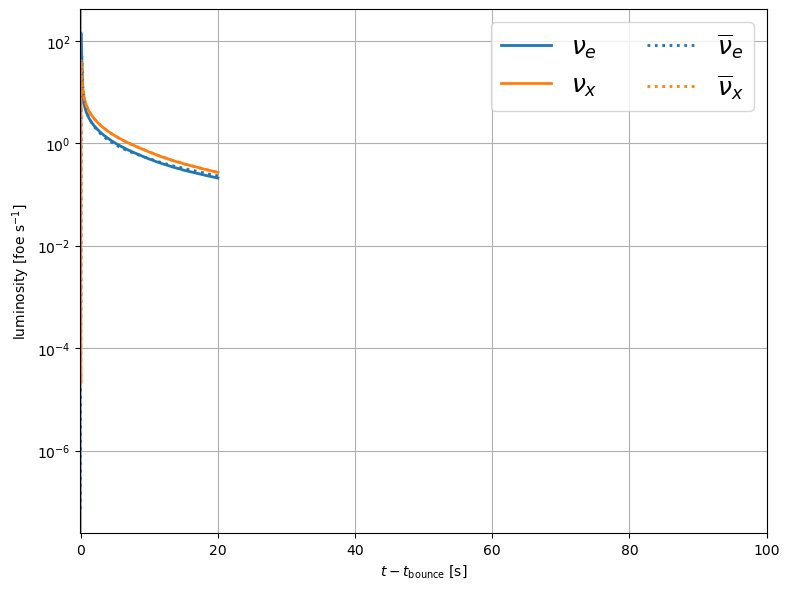

In [22]:
fig, ax = plt.subplots(1, figsize=(8,6), tight_layout=False)

for flavor in Flavor:
    ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color = 'C0' if flavor.is_electron else 'C1',
            ls = '-' if flavor.is_neutrino else ':',
            lw = 2 )

ax.set(xlim=(-0.05, 100),
       # xscale='log',
       xlabel=r'$t-t_{\rm bounce}$ [s]',
       ylabel=r'luminosity [foe s$^{-1}$]',
       yscale='log')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18);

In [23]:
model_ext = ExtendedModel(model)
model_ext.extend(np.logspace(0,2,1000)*u.s)

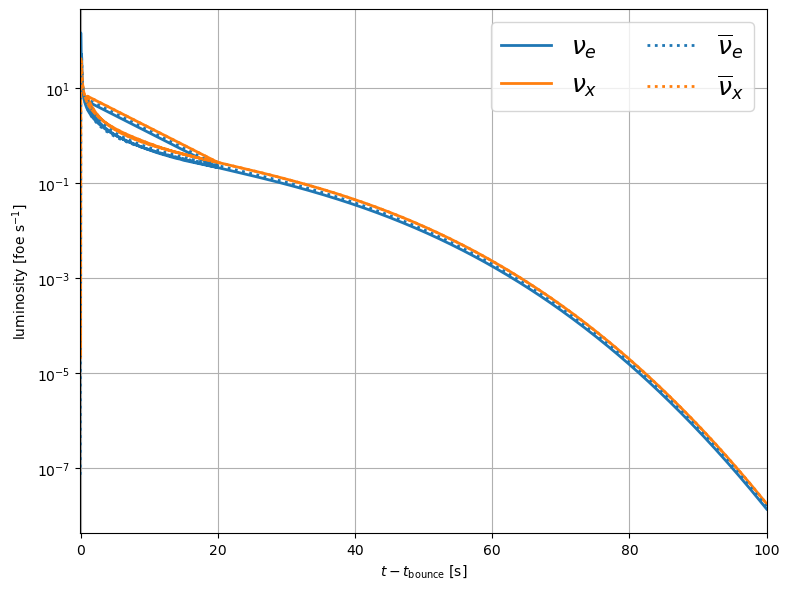

In [24]:
fig, ax = plt.subplots(1, figsize=(8,6), tight_layout=False)

for flavor in Flavor:
    # ax.plot(model.time, model.luminosity[flavor]/1e51)
    ax.plot(model_ext.time, model_ext.luminosity[flavor]/1e51, # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color = 'C0' if flavor.is_electron else 'C1',
            ls = '-' if flavor.is_neutrino else ':',
            lw = 2 )

ax.set(xlim=(-0.05, 100),
       # xscale='log',
       xlabel=r'$t-t_{\rm bounce}$ [s]',
       ylabel=r'luminosity [foe s$^{-1}$]',
       yscale='log')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18);